## Homework 3
*For any questions or concerns please email your instructor at `smanna@scu.edu`*
### Due - 05/15/2020 - 11:59p - 100 points

**Name:** `<Jeffrey Lin>`

**Email** `<jlin7@scu.edu>`

**Objectives:** 
* Implement and understand multi-class classifier using MLP
* Familiarity with `Keras`

**Submission Instructions:** 
* Please download `hw3.ipynb`, `train_nn.csv`, and `test_nn.csv` files and insert cells in the `hw3.ipynb` to complete your homework and submit the same file to Camino under `Homework` $\rightarrow$ `hw3`.
* Please make sure you type your `Name` and `Email` on top of your submission file in the placeholder above. 

**Honor Code:** You are expected to complete the homework on your own. Solutions might exist elsewhere, but you are not allowed to copy them. 

### Problem Statement
You are given a dataset of different `Iris` flower species. The original [dataset](https://archive.ics.uci.edu/ml/datasets/iris) has detailed description of all the characteristics of the flowers. Please feel free to visit the original page to know more about the dataset. Your task is to develop a Neural Network based multi-class classifier using `Keras` to categorize the flowers based on their species. 

**Guide**: Feel free to use `week6-keras-diabetes.ipynb` as a sample to kick-start your implentation. If you simply try to copy and paste the code into your homework, trust me, it won't work!!! 

Here are few things you can try:
* *One hot encoding*: There are three `species` of iris flower in your dataset. This time, you have to classify your data into `three` different categories. For that you need to compute `one hot encoding`.
* *Activation functions*: There are different activation functions used in Neural Network (NN). Your task is to research different activation functions such as SoftMax, ReLu, and Sigmoid, and learn which ones are suitable for which layers of your neural network. Based on that, design your NN architecture and check the performance by computing `accuracy`.
* *Number of hidden layers*: Instead on using one hidden layer, you can try two and check out your results and check the performance by computing `accuracy`.
* *Loss functions*: Keras comes with different  `loss` functions. Your task is to review them and pick any two to report your findings.

**Adaptation**: We have provided you with the original dataset splitting it into two, one for training and the other for testing. You can use `train_nn.csv` to train the parameters of your model and then use `test_nn.csv` to test your model.

**Note**: Please make sure you have proper comments and explanation/justification of the steps you have coded. Please feel to add extra cells to complete all the `TODO` stubs. You are allowed to create your own utility functions to support your code.

In [1]:
# importing the libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# TODO - feel free to add more as you need!
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
'Loading the train Iris dataset'
# Define headers since the dataset does not have any headers
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
# reading the training data into the data frame
train_df = pd.read_csv('train_NN.csv', header=None, names=col_names)
# reading the test data into the data frame
test_df = pd.read_csv('test_NN.csv', header=None, names=col_names)
test_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.1,1.5,0.1,Iris-setosa
2,4.4,3.0,1.3,0.2,Iris-setosa
3,5.1,3.4,1.5,0.2,Iris-setosa
4,5.0,3.5,1.3,0.3,Iris-setosa
5,4.5,2.3,1.3,0.3,Iris-setosa


In [3]:
# remove and missing Values in the dataset
train_df_label = train_df['species']
train_df_features = train_df.drop('species', 1)
train_df_features.replace('?', -99999, inplace=True)

test_df_label = test_df['species']
test_df_features = test_df.drop('species', 1)
test_df.replace('?', -99999, inplace=True)

print(train_df_label.head())
train_df_features.head()

1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: species, dtype: object


,sepal_length,sepal_width,petal_length,petal_width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [4]:
'Perform One Hot Encoding for the classifier to work'
# TODO
trainlabel = []
for lab in train_df_label:
    if lab == 'Iris-setosa':
        trainlabel.append([1, 0, 0])  # class 2
    elif lab == 'Iris-versicolor':
        trainlabel.append([0, 1, 0])  # class 1
    elif lab == 'Iris-virginica':
        trainlabel.append([0, 0, 1])  # class 0

testlabel = []
for lab in test_df_features:
    if lab == 'Iris-setosa':
        testlabel.append([1, 0, 0])  # class 2
    elif lab == 'Iris-versicolor':
        testlabel.append([0, 1, 0])  # class 1
    elif lab == 'Iris-virginica':
        testlabel.append([0, 0, 1])  # class 0

In [5]:
'Assigning features and output columns and converting them into numpy arrays'
# this is upto you.
# you can do it in your way
# TODO (optional)
train_data = np.array(train_df_features)
train_label = np.array(trainlabel)
print(train_data.shape,train_label.shape)

test_data = np.array(test_df_features)
test_label = np.array(testlabel)
print(train_data.shape,train_label.shape)

((112, 4), (112, 3))
((112, 4), (112, 3))


In [6]:
# Printing the dimensions of your train, and test data
# TODO
#x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)
x_train = train_data
y_train = train_label
print(x_train.shape)

x_test = test_data
y_test = testlabel
print(x_test.shape)

(112, 4)
(38, 4)


In [7]:
'Defining the model'
# TODO
model = Sequential()
model.add(Dense(500, input_dim=4, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

'Train your model...'
'Store the cost (or loss), so that you can use it to plot the graph'
# You might want to check out this: https://keras.io/callbacks/#create-a-callback
# TODO
history_callback = model.fit(x_train,y_train, epochs=1000, batch_size=70, validation_data=(x_train, y_train))
loss_history = history_callback.history["loss"]

Train on 112 samples, validate on 112 samples
Epoch 1/1000
112/112 [==============================] - 0s 1ms/step - loss: 0.2353 - accuracy: 0.2589 - val_loss: 0.2229 - val_accuracy: 0.3304
Epoch 2/1000
112/112 [==============================] - 0s 73us/step - loss: 0.2228 - accuracy: 0.3304 - val_loss: 0.2188 - val_accuracy: 0.3393
Epoch 3/1000
112/112 [==============================] - 0s 61us/step - loss: 0.2191 - accuracy: 0.4821 - val_loss: 0.2202 - val_accuracy: 0.3304
Epoch 4/1000
112/112 [==============================] - 0s 63us/step - loss: 0.2195 - accuracy: 0.3304 - val_loss: 0.2133 - val_accuracy: 0.3304
Epoch 5/1000
112/112 [==============================] - 0s 60us/step - loss: 0.2111 - accuracy: 0.3750 - val_loss: 0.2049 - val_accuracy: 0.6696
Epoch 6/1000
112/112 [==============================] - 0s 58us/step - loss: 0.2040 - accuracy: 0.7054 - val_loss: 0.2053 - val_accuracy: 0.4821
Epoch 7/1000
112/112 [==============================] - 0s 63us/step - loss: 0.2065 -

Epoch 57/1000
112/112 [==============================] - 0s 69us/step - loss: 0.0659 - accuracy: 0.9286 - val_loss: 0.0648 - val_accuracy: 0.9286
Epoch 58/1000
112/112 [==============================] - 0s 69us/step - loss: 0.0643 - accuracy: 0.9286 - val_loss: 0.0620 - val_accuracy: 0.9643
Epoch 59/1000
112/112 [==============================] - 0s 61us/step - loss: 0.0625 - accuracy: 0.9643 - val_loss: 0.0615 - val_accuracy: 0.9554
Epoch 60/1000
112/112 [==============================] - 0s 72us/step - loss: 0.0614 - accuracy: 0.9464 - val_loss: 0.0596 - val_accuracy: 0.9732
Epoch 61/1000
112/112 [==============================] - 0s 58us/step - loss: 0.0594 - accuracy: 0.9643 - val_loss: 0.0586 - val_accuracy: 0.9643
Epoch 62/1000
112/112 [==============================] - 0s 70us/step - loss: 0.0586 - accuracy: 0.9643 - val_loss: 0.0575 - val_accuracy: 0.9643
Epoch 63/1000
112/112 [==============================] - 0s 59us/step - loss: 0.0574 - accuracy: 0.9643 - val_loss: 0.0563 -

Epoch 113/1000
112/112 [==============================] - 0s 66us/step - loss: 0.0282 - accuracy: 0.9554 - val_loss: 0.0269 - val_accuracy: 0.9554
Epoch 114/1000
112/112 [==============================] - 0s 82us/step - loss: 0.0275 - accuracy: 0.9554 - val_loss: 0.0265 - val_accuracy: 0.9643
Epoch 115/1000
112/112 [==============================] - 0s 72us/step - loss: 0.0265 - accuracy: 0.9643 - val_loss: 0.0261 - val_accuracy: 0.9643
Epoch 116/1000
112/112 [==============================] - 0s 75us/step - loss: 0.0261 - accuracy: 0.9643 - val_loss: 0.0260 - val_accuracy: 0.9732
Epoch 117/1000
112/112 [==============================] - 0s 86us/step - loss: 0.0264 - accuracy: 0.9643 - val_loss: 0.0260 - val_accuracy: 0.9554
Epoch 118/1000
112/112 [==============================] - 0s 62us/step - loss: 0.0261 - accuracy: 0.9643 - val_loss: 0.0255 - val_accuracy: 0.9643
Epoch 119/1000
112/112 [==============================] - 0s 66us/step - loss: 0.0255 - accuracy: 0.9643 - val_loss: 0

112/112 [==============================] - 0s 55us/step - loss: 0.0185 - accuracy: 0.9821 - val_loss: 0.0184 - val_accuracy: 0.9732
Epoch 169/1000
112/112 [==============================] - 0s 54us/step - loss: 0.0188 - accuracy: 0.9732 - val_loss: 0.0188 - val_accuracy: 0.9732
Epoch 170/1000
112/112 [==============================] - 0s 54us/step - loss: 0.0186 - accuracy: 0.9732 - val_loss: 0.0181 - val_accuracy: 0.9732
Epoch 171/1000
112/112 [==============================] - 0s 60us/step - loss: 0.0179 - accuracy: 0.9821 - val_loss: 0.0188 - val_accuracy: 0.9554
Epoch 172/1000
112/112 [==============================] - 0s 59us/step - loss: 0.0193 - accuracy: 0.9554 - val_loss: 0.0188 - val_accuracy: 0.9554
Epoch 173/1000
112/112 [==============================] - 0s 58us/step - loss: 0.0191 - accuracy: 0.9643 - val_loss: 0.0180 - val_accuracy: 0.9732
Epoch 174/1000
112/112 [==============================] - 0s 57us/step - loss: 0.0185 - accuracy: 0.9732 - val_loss: 0.0182 - val_acc

Epoch 224/1000
112/112 [==============================] - 0s 72us/step - loss: 0.0152 - accuracy: 0.9821 - val_loss: 0.0152 - val_accuracy: 0.9821
Epoch 225/1000
112/112 [==============================] - 0s 60us/step - loss: 0.0152 - accuracy: 0.9821 - val_loss: 0.0151 - val_accuracy: 0.9821
Epoch 226/1000
112/112 [==============================] - 0s 62us/step - loss: 0.0151 - accuracy: 0.9821 - val_loss: 0.0151 - val_accuracy: 0.9821
Epoch 227/1000
112/112 [==============================] - 0s 67us/step - loss: 0.0151 - accuracy: 0.9821 - val_loss: 0.0151 - val_accuracy: 0.9821
Epoch 228/1000
112/112 [==============================] - 0s 65us/step - loss: 0.0151 - accuracy: 0.9821 - val_loss: 0.0150 - val_accuracy: 0.9821
Epoch 229/1000
112/112 [==============================] - 0s 77us/step - loss: 0.0150 - accuracy: 0.9732 - val_loss: 0.0150 - val_accuracy: 0.9821
Epoch 230/1000
112/112 [==============================] - 0s 88us/step - loss: 0.0150 - accuracy: 0.9821 - val_loss: 0

Epoch 280/1000
112/112 [==============================] - 0s 75us/step - loss: 0.0141 - accuracy: 0.9732 - val_loss: 0.0138 - val_accuracy: 0.9821
Epoch 281/1000
112/112 [==============================] - 0s 78us/step - loss: 0.0137 - accuracy: 0.9821 - val_loss: 0.0135 - val_accuracy: 0.9821
Epoch 282/1000
112/112 [==============================] - 0s 79us/step - loss: 0.0134 - accuracy: 0.9821 - val_loss: 0.0141 - val_accuracy: 0.9821
Epoch 283/1000
112/112 [==============================] - 0s 86us/step - loss: 0.0141 - accuracy: 0.9821 - val_loss: 0.0140 - val_accuracy: 0.9821
Epoch 284/1000
112/112 [==============================] - 0s 72us/step - loss: 0.0138 - accuracy: 0.9821 - val_loss: 0.0134 - val_accuracy: 0.9821
Epoch 285/1000
112/112 [==============================] - 0s 58us/step - loss: 0.0135 - accuracy: 0.9911 - val_loss: 0.0143 - val_accuracy: 0.9643
Epoch 286/1000
112/112 [==============================] - 0s 77us/step - loss: 0.0147 - accuracy: 0.9643 - val_loss: 0

112/112 [==============================] - 0s 63us/step - loss: 0.0125 - accuracy: 0.9821 - val_loss: 0.0128 - val_accuracy: 0.9821
Epoch 336/1000
112/112 [==============================] - 0s 61us/step - loss: 0.0130 - accuracy: 0.9821 - val_loss: 0.0134 - val_accuracy: 0.9821
Epoch 337/1000
112/112 [==============================] - 0s 59us/step - loss: 0.0134 - accuracy: 0.9821 - val_loss: 0.0126 - val_accuracy: 0.9821
Epoch 338/1000
112/112 [==============================] - 0s 66us/step - loss: 0.0130 - accuracy: 0.9821 - val_loss: 0.0128 - val_accuracy: 0.9821
Epoch 339/1000
112/112 [==============================] - 0s 56us/step - loss: 0.0131 - accuracy: 0.9732 - val_loss: 0.0126 - val_accuracy: 0.9911
Epoch 340/1000
112/112 [==============================] - 0s 61us/step - loss: 0.0126 - accuracy: 0.9911 - val_loss: 0.0125 - val_accuracy: 0.9821
Epoch 341/1000
112/112 [==============================] - 0s 69us/step - loss: 0.0128 - accuracy: 0.9821 - val_loss: 0.0125 - val_acc

Epoch 391/1000
112/112 [==============================] - 0s 63us/step - loss: 0.0147 - accuracy: 0.9732 - val_loss: 0.0133 - val_accuracy: 0.9643
Epoch 392/1000
112/112 [==============================] - 0s 59us/step - loss: 0.0128 - accuracy: 0.9732 - val_loss: 0.0120 - val_accuracy: 0.9821
Epoch 393/1000
112/112 [==============================] - 0s 60us/step - loss: 0.0130 - accuracy: 0.9732 - val_loss: 0.0136 - val_accuracy: 0.9643
Epoch 394/1000
112/112 [==============================] - 0s 75us/step - loss: 0.0140 - accuracy: 0.9643 - val_loss: 0.0121 - val_accuracy: 0.9821
Epoch 395/1000
112/112 [==============================] - 0s 65us/step - loss: 0.0122 - accuracy: 0.9911 - val_loss: 0.0138 - val_accuracy: 0.9643
Epoch 396/1000
112/112 [==============================] - 0s 60us/step - loss: 0.0139 - accuracy: 0.9643 - val_loss: 0.0139 - val_accuracy: 0.9643
Epoch 397/1000
112/112 [==============================] - 0s 66us/step - loss: 0.0135 - accuracy: 0.9643 - val_loss: 0

Epoch 447/1000
112/112 [==============================] - 0s 74us/step - loss: 0.0118 - accuracy: 0.9911 - val_loss: 0.0118 - val_accuracy: 0.9821
Epoch 448/1000
112/112 [==============================] - 0s 65us/step - loss: 0.0119 - accuracy: 0.9821 - val_loss: 0.0121 - val_accuracy: 0.9821
Epoch 449/1000
112/112 [==============================] - 0s 56us/step - loss: 0.0121 - accuracy: 0.9821 - val_loss: 0.0116 - val_accuracy: 0.9821
Epoch 450/1000
112/112 [==============================] - 0s 60us/step - loss: 0.0114 - accuracy: 0.9821 - val_loss: 0.0122 - val_accuracy: 0.9732
Epoch 451/1000
112/112 [==============================] - 0s 60us/step - loss: 0.0124 - accuracy: 0.9732 - val_loss: 0.0125 - val_accuracy: 0.9732
Epoch 452/1000
112/112 [==============================] - 0s 61us/step - loss: 0.0129 - accuracy: 0.9643 - val_loss: 0.0116 - val_accuracy: 0.9821
Epoch 453/1000
112/112 [==============================] - 0s 60us/step - loss: 0.0115 - accuracy: 0.9821 - val_loss: 0

112/112 [==============================] - 0s 212us/step - loss: 0.0113 - accuracy: 0.9821 - val_loss: 0.0117 - val_accuracy: 0.9821
Epoch 503/1000
112/112 [==============================] - 0s 154us/step - loss: 0.0119 - accuracy: 0.9821 - val_loss: 0.0115 - val_accuracy: 0.9821
Epoch 504/1000
112/112 [==============================] - 0s 98us/step - loss: 0.0115 - accuracy: 0.9821 - val_loss: 0.0114 - val_accuracy: 0.9821
Epoch 505/1000
112/112 [==============================] - 0s 79us/step - loss: 0.0115 - accuracy: 0.9821 - val_loss: 0.0116 - val_accuracy: 0.9821
Epoch 506/1000
112/112 [==============================] - 0s 74us/step - loss: 0.0116 - accuracy: 0.9821 - val_loss: 0.0113 - val_accuracy: 0.9821
Epoch 507/1000
112/112 [==============================] - 0s 82us/step - loss: 0.0113 - accuracy: 0.9821 - val_loss: 0.0113 - val_accuracy: 0.9821
Epoch 508/1000
112/112 [==============================] - 0s 74us/step - loss: 0.0113 - accuracy: 0.9821 - val_loss: 0.0115 - val_a

Epoch 558/1000
112/112 [==============================] - 0s 75us/step - loss: 0.0113 - accuracy: 0.9821 - val_loss: 0.0113 - val_accuracy: 0.9821
Epoch 559/1000
112/112 [==============================] - 0s 72us/step - loss: 0.0114 - accuracy: 0.9821 - val_loss: 0.0111 - val_accuracy: 0.9821
Epoch 560/1000
112/112 [==============================] - 0s 70us/step - loss: 0.0111 - accuracy: 0.9821 - val_loss: 0.0111 - val_accuracy: 0.9821
Epoch 561/1000
112/112 [==============================] - 0s 75us/step - loss: 0.0124 - accuracy: 0.9821 - val_loss: 0.0113 - val_accuracy: 0.9821
Epoch 562/1000
112/112 [==============================] - 0s 60us/step - loss: 0.0112 - accuracy: 0.9821 - val_loss: 0.0113 - val_accuracy: 0.9821
Epoch 563/1000
112/112 [==============================] - 0s 68us/step - loss: 0.0113 - accuracy: 0.9821 - val_loss: 0.0117 - val_accuracy: 0.9732
Epoch 564/1000
112/112 [==============================] - 0s 78us/step - loss: 0.0118 - accuracy: 0.9732 - val_loss: 0

Epoch 614/1000
112/112 [==============================] - 0s 93us/step - loss: 0.0113 - accuracy: 0.9821 - val_loss: 0.0121 - val_accuracy: 0.9732
Epoch 615/1000
112/112 [==============================] - 0s 70us/step - loss: 0.0122 - accuracy: 0.9732 - val_loss: 0.0114 - val_accuracy: 0.9821
Epoch 616/1000
112/112 [==============================] - 0s 90us/step - loss: 0.0117 - accuracy: 0.9821 - val_loss: 0.0109 - val_accuracy: 0.9821
Epoch 617/1000
112/112 [==============================] - 0s 61us/step - loss: 0.0110 - accuracy: 0.9821 - val_loss: 0.0110 - val_accuracy: 0.9821
Epoch 618/1000
112/112 [==============================] - 0s 68us/step - loss: 0.0113 - accuracy: 0.9821 - val_loss: 0.0109 - val_accuracy: 0.9821
Epoch 619/1000
112/112 [==============================] - 0s 86us/step - loss: 0.0109 - accuracy: 0.9821 - val_loss: 0.0109 - val_accuracy: 0.9821
Epoch 620/1000
112/112 [==============================] - 0s 92us/step - loss: 0.0110 - accuracy: 0.9821 - val_loss: 0

Epoch 670/1000
112/112 [==============================] - 0s 59us/step - loss: 0.0108 - accuracy: 0.9821 - val_loss: 0.0110 - val_accuracy: 0.9821
Epoch 671/1000
112/112 [==============================] - 0s 59us/step - loss: 0.0112 - accuracy: 0.9821 - val_loss: 0.0108 - val_accuracy: 0.9821
Epoch 672/1000
112/112 [==============================] - 0s 57us/step - loss: 0.0109 - accuracy: 0.9821 - val_loss: 0.0108 - val_accuracy: 0.9821
Epoch 673/1000
112/112 [==============================] - 0s 56us/step - loss: 0.0111 - accuracy: 0.9821 - val_loss: 0.0108 - val_accuracy: 0.9821
Epoch 674/1000
112/112 [==============================] - 0s 56us/step - loss: 0.0109 - accuracy: 0.9821 - val_loss: 0.0111 - val_accuracy: 0.9821
Epoch 675/1000
112/112 [==============================] - 0s 51us/step - loss: 0.0120 - accuracy: 0.9732 - val_loss: 0.0120 - val_accuracy: 0.9732
Epoch 676/1000
112/112 [==============================] - 0s 59us/step - loss: 0.0117 - accuracy: 0.9732 - val_loss: 0

Epoch 726/1000
112/112 [==============================] - 0s 58us/step - loss: 0.0118 - accuracy: 0.9821 - val_loss: 0.0108 - val_accuracy: 0.9821
Epoch 727/1000
112/112 [==============================] - 0s 66us/step - loss: 0.0112 - accuracy: 0.9821 - val_loss: 0.0108 - val_accuracy: 0.9821
Epoch 728/1000
112/112 [==============================] - 0s 58us/step - loss: 0.0110 - accuracy: 0.9821 - val_loss: 0.0109 - val_accuracy: 0.9821
Epoch 729/1000
112/112 [==============================] - 0s 58us/step - loss: 0.0110 - accuracy: 0.9821 - val_loss: 0.0107 - val_accuracy: 0.9821
Epoch 730/1000
112/112 [==============================] - 0s 56us/step - loss: 0.0114 - accuracy: 0.9821 - val_loss: 0.0116 - val_accuracy: 0.9821
Epoch 731/1000
112/112 [==============================] - 0s 55us/step - loss: 0.0117 - accuracy: 0.9821 - val_loss: 0.0108 - val_accuracy: 0.9821
Epoch 732/1000
112/112 [==============================] - 0s 55us/step - loss: 0.0103 - accuracy: 0.9821 - val_loss: 0

Epoch 782/1000
112/112 [==============================] - 0s 53us/step - loss: 0.0107 - accuracy: 0.9821 - val_loss: 0.0106 - val_accuracy: 0.9821
Epoch 783/1000
112/112 [==============================] - 0s 55us/step - loss: 0.0109 - accuracy: 0.9821 - val_loss: 0.0106 - val_accuracy: 0.9821
Epoch 784/1000
112/112 [==============================] - 0s 57us/step - loss: 0.0108 - accuracy: 0.9821 - val_loss: 0.0106 - val_accuracy: 0.9821
Epoch 785/1000
112/112 [==============================] - 0s 61us/step - loss: 0.0107 - accuracy: 0.9821 - val_loss: 0.0106 - val_accuracy: 0.9821
Epoch 786/1000
112/112 [==============================] - 0s 56us/step - loss: 0.0107 - accuracy: 0.9821 - val_loss: 0.0106 - val_accuracy: 0.9821
Epoch 787/1000
112/112 [==============================] - 0s 54us/step - loss: 0.0107 - accuracy: 0.9821 - val_loss: 0.0106 - val_accuracy: 0.9821
Epoch 788/1000
112/112 [==============================] - 0s 55us/step - loss: 0.0113 - accuracy: 0.9821 - val_loss: 0

Epoch 838/1000
112/112 [==============================] - 0s 70us/step - loss: 0.0107 - accuracy: 0.9821 - val_loss: 0.0110 - val_accuracy: 0.9821
Epoch 839/1000
112/112 [==============================] - 0s 79us/step - loss: 0.0117 - accuracy: 0.9732 - val_loss: 0.0110 - val_accuracy: 0.9821
Epoch 840/1000
112/112 [==============================] - 0s 63us/step - loss: 0.0108 - accuracy: 0.9821 - val_loss: 0.0108 - val_accuracy: 0.9821
Epoch 841/1000
112/112 [==============================] - 0s 67us/step - loss: 0.0112 - accuracy: 0.9821 - val_loss: 0.0114 - val_accuracy: 0.9821
Epoch 842/1000
112/112 [==============================] - 0s 61us/step - loss: 0.0113 - accuracy: 0.9821 - val_loss: 0.0106 - val_accuracy: 0.9821
Epoch 843/1000
112/112 [==============================] - 0s 57us/step - loss: 0.0104 - accuracy: 0.9821 - val_loss: 0.0109 - val_accuracy: 0.9821
Epoch 844/1000
112/112 [==============================] - 0s 58us/step - loss: 0.0115 - accuracy: 0.9732 - val_loss: 0

Epoch 894/1000
112/112 [==============================] - 0s 59us/step - loss: 0.0117 - accuracy: 0.9732 - val_loss: 0.0105 - val_accuracy: 0.9821
Epoch 895/1000
112/112 [==============================] - 0s 53us/step - loss: 0.0124 - accuracy: 0.9821 - val_loss: 0.0129 - val_accuracy: 0.9643
Epoch 896/1000
112/112 [==============================] - 0s 65us/step - loss: 0.0130 - accuracy: 0.9732 - val_loss: 0.0113 - val_accuracy: 0.9821
Epoch 897/1000
112/112 [==============================] - 0s 62us/step - loss: 0.0114 - accuracy: 0.9821 - val_loss: 0.0105 - val_accuracy: 0.9821
Epoch 898/1000
112/112 [==============================] - 0s 59us/step - loss: 0.0104 - accuracy: 0.9821 - val_loss: 0.0109 - val_accuracy: 0.9821
Epoch 899/1000
112/112 [==============================] - 0s 57us/step - loss: 0.0111 - accuracy: 0.9821 - val_loss: 0.0108 - val_accuracy: 0.9821
Epoch 900/1000
112/112 [==============================] - 0s 55us/step - loss: 0.0112 - accuracy: 0.9821 - val_loss: 0

Epoch 950/1000
112/112 [==============================] - 0s 55us/step - loss: 0.0119 - accuracy: 0.9821 - val_loss: 0.0110 - val_accuracy: 0.9821
Epoch 951/1000
112/112 [==============================] - 0s 57us/step - loss: 0.0110 - accuracy: 0.9821 - val_loss: 0.0105 - val_accuracy: 0.9821
Epoch 952/1000
112/112 [==============================] - 0s 93us/step - loss: 0.0107 - accuracy: 0.9821 - val_loss: 0.0108 - val_accuracy: 0.9821
Epoch 953/1000
112/112 [==============================] - 0s 64us/step - loss: 0.0109 - accuracy: 0.9821 - val_loss: 0.0107 - val_accuracy: 0.9821
Epoch 954/1000
112/112 [==============================] - 0s 87us/step - loss: 0.0107 - accuracy: 0.9821 - val_loss: 0.0105 - val_accuracy: 0.9821
Epoch 955/1000
112/112 [==============================] - 0s 66us/step - loss: 0.0105 - accuracy: 0.9821 - val_loss: 0.0104 - val_accuracy: 0.9821
Epoch 956/1000
112/112 [==============================] - 0s 55us/step - loss: 0.0105 - accuracy: 0.9821 - val_loss: 0

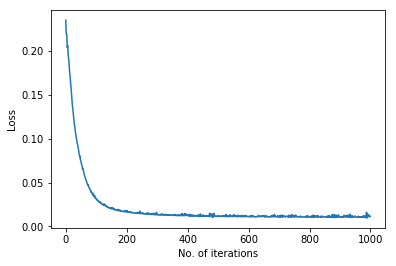

In [8]:
'Plot loss'
# TODO
plt.plot(loss_history)
plt.xlabel("No. of iterations")
plt.ylabel("Loss")
plt.show()

# A sample code is provided below. 

#plt.plot(iter, loss_hist)
#plt.xlabel("No. of iterations")
#plt.ylabel("Loss")

In [9]:
'Test the neural network'
# Here you have to find out predicted output for every data from your test dataset
# TODO
test_prediction = []

for row in range(len(test_df)):
    test = np.array([x_test[row]])
    result = model.predict_classes(test)
    if result==0:
        test_prediction.append("Iris-setosa")
    elif result==1:
        test_prediction.append("Iris-versicolor")
    elif result==2:
        test_prediction.append("Iris-virginica")

test_df['prediction'] = test_prediction
test_df['prediction']

1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14    Iris-versicolor
15    Iris-versicolor
16    Iris-versicolor
17    Iris-versicolor
18    Iris-versicolor
19    Iris-versicolor
20    Iris-versicolor
21    Iris-versicolor
22    Iris-versicolor
23    Iris-versicolor
24    Iris-versicolor
25    Iris-versicolor
26    Iris-versicolor
27     Iris-virginica
28     Iris-virginica
29     Iris-virginica
30     Iris-virginica
31     Iris-virginica
32     Iris-virginica
33     Iris-virginica
34     Iris-virginica
35     Iris-virginica
36     Iris-virginica
37     Iris-virginica
38     Iris-virginica
Name: prediction, dtype: object

In [10]:
# You can print your actual y from test and predicted y using test
# you might have to check the dimensions of each to make sure you can compare them later
# TODO
test_df

,sepal_length,sepal_width,petal_length,petal_width,species,prediction
1,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa
2,4.4,3.0,1.3,0.2,Iris-setosa,Iris-setosa
3,5.1,3.4,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
5,4.5,2.3,1.3,0.3,Iris-setosa,Iris-setosa
6,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa
7,5.0,3.5,1.6,0.6,Iris-setosa,Iris-setosa
8,5.1,3.8,1.9,0.4,Iris-setosa,Iris-setosa
9,4.8,3.0,1.4,0.3,Iris-setosa,Iris-setosa
10,5.1,3.8,1.6,0.2,Iris-setosa,Iris-setosa


In [11]:
'Compute accuracy'
# You can use sci-kit learn's accuracy score to evaluate the performance of your model on test data
# TODO
print("The model had a " + str((accuracy_score(test_df['species'], test_df['prediction']))) + " accuracy rate.")

The model had a 1.0 accuracy rate.
